In [511]:
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path

In [2]:
# GZ vector is 37D.
# This vector is divided up into sectors that correspond to the values of the categorial distribution of answers to 
# different questions, obtained from crowd sourcing the answers.
# We need to turn the 37D vector in to a list of galaxy attributes using the decision tree

In [19]:
task_sectors = {
    1: slice(0, 3),
    2: slice(3, 5),
    3: slice(5, 7),
    4: slice(7, 9),
    5: slice(9, 13),
    6: slice(13, 15),
    7: slice(15, 18),
    8: slice(18, 25),
    9: slice(25, 28),
    10: slice(28, 31),
    11: slice(31, 37),
}

In [100]:
## write the out the question logic as functions
def vec2labels(v):
    """
    Translate the 37D vector into a list of labels
    """
    return task1(v, [])


def task1(v, labels):
    """
    Is the galaxy:
        smooth
        features or disk
        star of artifact
    """
    r = np.argmax(v[task_sectors[1]])
    if r == 0:
        labels.append('smooth')
        return task7(v, labels)
    elif r == 1:
        labels.append('features or disk')
        return task2(v, labels)
    else:
        labels.append('star or artifact')
        return labels
        

def task2(v, labels):
    """
    Could this be disk viewed edge-on?
        yes
        no
    """
    r = np.argmax(v[task_sectors[2]])
    if r == 0:
        labels.append('edge-on disk')
        return task9(v, labels)
    else:
        return task3(v, labels)
    
    
def task3(v, labels):
    """
    Is there are sign of a bar feature through the 
    centre of the galaxy?
        yes
        no
    """
    r = np.argmax(v[task_sectors[3]])
    if r == 0:
        labels.append('bar')
    return task4(v, labels)


def task4(v, labels):
    """
    Is there any sign of a spiral arm
    pattern?
        yes
        no
    """
    r = np.argmax(v[task_sectors[4]])
    if r == 0:
        labels.append('spiral')
        return task10(v, labels)
    else:
        return task5(v, labels)
    

def task5(v, labels):
    """
    How prominent is the central bulge, compared
    with the rest of the galaxy?
        no bulge
        just noticeable
        obvious
        dominant
    """
    r = np.argmax(v[task_sectors[5]])
    if r == 0:
        labels.append('no bulge')
    elif r == 1:
        labels.append('just noticeable bulge')
    elif r == 2:
        labels.append('obvious bulge')
    else:
        labels.append('dominant bulge')
    
    return task6(v, labels)


def task6(v, labels):
    """
    Is there anything else odd?
        yes
        no
    """
    r = np.argmax(v[task_sectors[6]])
    if r == 0:
        return task8(v, labels)
    else:
        return labels
    
    
def task7(v, labels):
    """
    How rounded is it?
        completely round
        in between
        cigar-shaped
    """
    r = np.argmax(v[task_sectors[7]])
    if r == 0:
        labels.append('completely round')
    elif r == 1:
        labels.append('somewhat round')
    else:
        labels.append('cigar shaped')
        
    return task6(v, labels)


def task8(v, labels):
    """
    Is the odd feature of ring or is the galaxy 
    disturbed or irregular?
        ring
        lens or arc
        disturbed
        irregular
        other
        merger
        dust lane
    """
    r = np.argmax(v[task_sectors[8]])
    if r == 0:
        labels.append('ring')
    elif r == 1:
        labels.append('lens or arc')
    elif r == 2:
        labels.append('disturbed')
    elif r == 3:
        labels.append('irregular')
    elif r == 4:
        labels.append('other')
    elif r == 5:
        labels.append('merger')
    else:
        labels.append('dust lane')
        
    return labels


def task9(v, labels):
    """
    Does the galaxy have a bulge at its centre?
    If so what shape?
        round
        boxy
        no bulge
    """
    r = np.argmax(v[task_sectors[9]])
    if r == 0:
        labels.append('rounded bulge')
    elif r == 1:
        labels.append('boxy bulge')
    else:
        labels.append('no bulge')
        
    return task6(v, labels)


def task10(v, labels):
    """
    How tightly wound do the spiral arms appear?
        tight
        medium
        loose
    """
    r = np.argmax(v[task_sectors[10]])
    if r == 0:
        labels.append('tight arms')
    elif r == 1:
        labels.append('medium-tight arms')
    else:
        labels.append('loose arms')
        
    return task11(v, labels)


def task11(v, labels):
    """
    How many spiral arms are there?
        1-4
        more than four
        can't tell
    """
    r = np.argmax(v[task_sectors[11]])
    if r < 4:
        labels.append(f'# spiral arms: {r+1}')
    elif r == 4:
        labels.append('# spiral arms: >4')
    else:
        labels.append('# spiral arms: ??')
        
    return task5(v, labels)

In [35]:
test_vector = np.array([0.021834,0.976952,0.001214,0.021750859,0.955201141,0.313076726,0.642124415,0.546490632,0.408710509,0.160096487,0.760687801,0.034416852,0,0.611499,0.388501,0.010917,0.010917,0,0,0.032377038,0.064143188,0.4502247,0,0.032377038,0.032377038,0,0,0.021750859,0.207252747,0.152044077,0.187193808,0,0,0.054649063,0.081973595,0.081973595,0.327894379])
test_vector.shape

(37,)

In [36]:
vec2labels(test_vector)

['features or disk',
 'spiral',
 'tight arms',
 '# spiral arms: ??',
 'just noticeable bulge',
 'irregular']

## Display some images and their labels

In [38]:
impath = Path('./data/images_training_rev1/')

In [39]:
vectors = pd.read_csv('./data/training_solutions_rev1.csv')

In [40]:
vectors

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.000000,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.000000,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,100122,0.738832,0.238159,0.023009,0.000000,0.238159,0.000000,0.238159,0.000000,0.238159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,100123,0.462492,0.456033,0.081475,0.000000,0.456033,0.000000,0.456033,0.000000,0.456033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,100128,0.687783,0.288344,0.023873,0.000000,0.288344,0.069098,0.219246,0.000000,0.288344,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,100134,0.021834,0.976952,0.001214,0.021751,0.955201,0.313077,0.642124,0.546491,0.408711,...,0.021751,0.207253,0.152044,0.187194,0.000000,0.000000,0.054649,0.081974,0.081974,0.327894
9,100143,0.269843,0.730157,0.000000,0.730157,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.168728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [170]:
def display_random_image_and_label():
    i = np.random.choice(range(0, len(vectors)))
    imageid = vectors['GalaxyID'].iloc[i]
    im = open_image(impath / f'{imageid}.JPG')
    v = vectors[vectors.columns[1:]].iloc[i].values
    
    display(im)
    print(vec2labels(v))
      

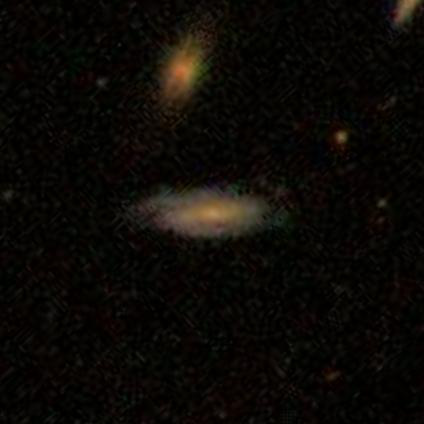

['features or disk', 'bar', 'spiral', 'medium-tight arms', '# spiral arms: 2', 'just noticeable bulge']


In [171]:
display_random_image_and_label()

## Use FastAI model to do inference!

In [133]:
from fastai import *
from fastai.vision import *

In [232]:
tfms = get_transforms(flip_vert=True, max_warp=0.0, xtra_tfms=rand_pad(6, 224))

In [504]:
src = (ImageList.from_csv('./data/',
                           'training_solutions_rev1.csv', 
                           folder='images_training_rev1', 
                           suffix='.jpg',
                           cols=0,)
            .split_by_rand_pct(0.2, seed=1234)
            .label_from_df(cols=list(range(1, 38)), label_cls=FloatList))
data = (src.transform(tfms, size=224)
           .databunch()).normalize(imagenet_stats)

In [505]:
learn = cnn_learner(data, models.resnet50, metrics=rmse, ps=0.4)

In [266]:
learn = load_learner('./data', 'galaxyzoo-resnet50-224.pkl')

In [267]:
learn.data = data

In [268]:
random.choice(data.valid_ds)

(Image (3, 224, 224),
 FloatItem [0.255797 0.744203 0.       0.       0.744203 0.041933 0.70227  0.16006  0.584143 0.106955 0.371181 0.142108 0.123959
  0.18335  0.81665  0.       0.24809  0.007707 0.091583 0.       0.030589 0.030589 0.030589 0.       0.       0.
  0.       0.       0.076639 0.083422 0.       0.       0.082915 0.       0.       0.       0.077145])

In [269]:
def display_random_image_and_predlabel():
    i = np.random.choice(range(0, len(vectors)))
    rand_item = random.choice(data.valid_ds)
    im = rand_item[0]
    v_true = rand_item[1].data
    v_pred = learn.predict(im)[0].data
    display(im)
    print('Pred: ', vec2labels(v_pred))
    print('True: ', vec2labels(v_true))

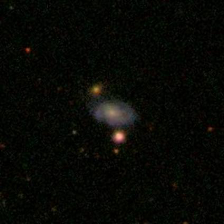

Pred:  ['features or disk', 'spiral', 'tight arms', '# spiral arms: 2', 'just noticeable bulge']
True:  ['features or disk', 'spiral', 'tight arms', '# spiral arms: ??', 'just noticeable bulge']


In [299]:
display_random_image_and_predlabel()

In [296]:
learn.predict(data.train_ds[0][0])[0].data

array([ 5.887986e-01,  3.893193e-01,  2.166761e-02,  7.943653e-03,  3.814928e-01,  2.409168e-02,  3.577205e-01,
        1.707865e-01,  2.107404e-01,  4.582454e-03,  1.340062e-01,  2.014069e-01,  4.182772e-02,  7.492161e-02,
        9.246479e-01,  2.939124e-01,  2.915003e-01,  3.662799e-03,  3.181666e-02,  1.302044e-02,  1.176527e-02,
        7.850267e-04,  1.801395e-02, -1.926456e-03,  8.912217e-04,  8.512504e-03,  2.054228e-04, -8.105077e-04,
        1.227146e-01,  4.315401e-02,  5.140789e-03,  1.271246e-02,  2.612600e-02,  6.580959e-03,  4.078378e-03,
        7.599404e-03,  1.128660e-01], dtype=float32)

In [237]:
np.random.choice([1, 2], p=[0.1, 0.3])

ValueError: probabilities do not sum to 1

In [238]:
print('hel')

hel


In [243]:
doc(cnn_learner)

In [244]:
lo = nn.Linear(37, 37)

In [245]:
model1 = nn.Sequential(learn.model, lo)

In [247]:
model_old = learn.model

In [256]:
learn.model = model1

In [257]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace)
          (downsample): Se

## Let's make a galaxyoutput layer in pytorch

In [330]:
eps = 1e-12

In [331]:
def normalize(q):
    return q / (q.sum() + eps)

In [474]:
def answer_probability(x):
    # clip probabilities
    nb = x.shape[0]
    x = x.clamp_min(0.)
    
    # normalize
    q1 = normalize(x[:, task_sectors[1]])
    q2 = normalize(x[:, task_sectors[2]])
    q3 = normalize(x[:, task_sectors[3]])
    q4 = normalize(x[:, task_sectors[4]])
    q5 = normalize(x[:, task_sectors[5]])
    q6 = normalize(x[:, task_sectors[6]])
    q7 = normalize(x[:, task_sectors[7]])
    q8 = normalize(x[:, task_sectors[8]])
    q9 = normalize(x[:, task_sectors[9]])
    q10 = normalize(x[:, task_sectors[10]])
    q11 = normalize(x[:, task_sectors[11]])
    
    # reweight 
    w1 = 1.0
    w2 = q1[:, 1] * w1
    w3 = q2[:, 1] * w2
    w4 = w3
    w5 = w4
    w6 = 1.0
    w7 = q1[:, 0] * w1
    w8 = q6[:, 0] * w6
    w9 = q2[:, 0] * w2
    w10 = q4[:, 0] * w4
    w11 = w10
    
    wq1 = w1*q1
    wq2 = w2[:, np.newaxis]*q2
    wq3 = w3[:, np.newaxis]*q3
    wq4 = w4[:, np.newaxis]*q4
    wq5 = w5[:, np.newaxis]*q5
    wq6 = w6*q6
    wq7 = w7[:, np.newaxis]*q7
    wq8 = w8[:, np.newaxis]*q8
    wq9 = w9[:, np.newaxis]*q9
    wq10 = w10[:, np.newaxis]*q10
    wq11 = w11[:, np.newaxis]*q11
    
    return torch.cat([wq1, wq2, wq3, wq4, wq5, wq6, wq7, wq8, wq9, wq10, wq11], dim=1)
    

In [485]:
t = torch.tensor(test_vector)[None]

In [486]:
t

tensor([[0.0218, 0.9770, 0.0012, 0.0218, 0.9552, 0.3131, 0.6421, 0.5465, 0.4087,
         0.1601, 0.7607, 0.0344, 0.0000, 0.6115, 0.3885, 0.0109, 0.0109, 0.0000,
         0.0000, 0.0324, 0.0641, 0.4502, 0.0000, 0.0324, 0.0324, 0.0000, 0.0000,
         0.0218, 0.2073, 0.1520, 0.1872, 0.0000, 0.0000, 0.0546, 0.0820, 0.0820,
         0.3279]], dtype=torch.float64)

In [401]:
t = t.clamp_min(0.)

In [402]:
t

tensor([[0.0218, 0.9770, 0.0012, 0.0218, 0.9552, 0.3131, 0.6421, 0.5465, 0.4087,
         0.1601, 0.7607, 0.0344, 0.0000, 0.6115, 0.3885, 0.0109, 0.0109, 0.0000,
         0.0000, 0.0324, 0.0641, 0.4502, 0.0000, 0.0324, 0.0324, 0.0000, 0.0000,
         0.0218, 0.2073, 0.1520, 0.1872, 0.0000, 0.0000, 0.0546, 0.0820, 0.0820,
         0.3279],
        [0.0218, 0.9770, 0.0012, 0.0218, 0.9552, 0.3131, 0.6421, 0.5465, 0.4087,
         0.1601, 0.7607, 0.0344, 0.0000, 0.6115, 0.3885, 0.0109, 0.0109, 0.0000,
         0.0000, 0.0324, 0.0641, 0.4502, 0.0000, 0.0324, 0.0324, 0.0000, 0.0000,
         0.0218, 0.2073, 0.1520, 0.1872, 0.0000, 0.0000, 0.0546, 0.0820, 0.0820,
         0.3279]], dtype=torch.float64)

In [403]:
q1 = normalize(t[:, task_sectors[1]])
q2 = normalize(t[:, task_sectors[2]])
q3 = normalize(t[:, task_sectors[3]])
q4 = normalize(t[:, task_sectors[4]])
q5 = normalize(t[:, task_sectors[5]])
q6 = normalize(t[:, task_sectors[6]])
q7 = normalize(t[:, task_sectors[7]])
q8 = normalize(t[:, task_sectors[8]])
q9 = normalize(t[:, task_sectors[9]])
q10 = normalize(t[:, task_sectors[10]])
q11 = normalize(t[:, task_sectors[11]])

In [404]:
q11

tensor([[0.0000, 0.0000, 0.0500, 0.0750, 0.0750, 0.3000],
        [0.0000, 0.0000, 0.0500, 0.0750, 0.0750, 0.3000]], dtype=torch.float64)

In [405]:
t[task_sectors[11]]

tensor([], size=(0, 37), dtype=torch.float64)

In [406]:
t

tensor([[0.0218, 0.9770, 0.0012, 0.0218, 0.9552, 0.3131, 0.6421, 0.5465, 0.4087,
         0.1601, 0.7607, 0.0344, 0.0000, 0.6115, 0.3885, 0.0109, 0.0109, 0.0000,
         0.0000, 0.0324, 0.0641, 0.4502, 0.0000, 0.0324, 0.0324, 0.0000, 0.0000,
         0.0218, 0.2073, 0.1520, 0.1872, 0.0000, 0.0000, 0.0546, 0.0820, 0.0820,
         0.3279],
        [0.0218, 0.9770, 0.0012, 0.0218, 0.9552, 0.3131, 0.6421, 0.5465, 0.4087,
         0.1601, 0.7607, 0.0344, 0.0000, 0.6115, 0.3885, 0.0109, 0.0109, 0.0000,
         0.0000, 0.0324, 0.0641, 0.4502, 0.0000, 0.0324, 0.0324, 0.0000, 0.0000,
         0.0218, 0.2073, 0.1520, 0.1872, 0.0000, 0.0000, 0.0546, 0.0820, 0.0820,
         0.3279]], dtype=torch.float64)

In [487]:
answer_probability(t)

tensor([[0.0218, 0.9770, 0.0012, 0.0218, 0.9552, 0.3131, 0.6421, 0.5465, 0.4087,
         0.1601, 0.7607, 0.0344, 0.0000, 0.6115, 0.3885, 0.0109, 0.0109, 0.0000,
         0.0000, 0.0324, 0.0641, 0.4502, 0.0000, 0.0324, 0.0324, 0.0000, 0.0000,
         0.0218, 0.2073, 0.1520, 0.1872, 0.0000, 0.0000, 0.0546, 0.0820, 0.0820,
         0.3279]], dtype=torch.float64)

In [488]:
torch.allclose(answer_probability(t), t)

True

In [476]:
class GalaxyOutput(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, xb):
        return answer_probability(xb)

In [477]:
g = GalaxyOutput()

In [478]:
g

GalaxyOutput()

In [479]:
g(t)

tensor([[0.0109, 0.4885, 0.0006, 0.0054, 0.2388, 0.0391, 0.0803, 0.0683, 0.0511,
         0.0200, 0.0951, 0.0043, 0.0000, 0.3057, 0.1943, 0.0027, 0.0027, 0.0000,
         0.0000, 0.0081, 0.0160, 0.1126, 0.0000, 0.0081, 0.0081, 0.0000, 0.0000,
         0.0027, 0.0130, 0.0095, 0.0117, 0.0000, 0.0000, 0.0034, 0.0051, 0.0051,
         0.0205],
        [0.0109, 0.4885, 0.0006, 0.0054, 0.2388, 0.0391, 0.0803, 0.0683, 0.0511,
         0.0200, 0.0951, 0.0043, 0.0000, 0.3057, 0.1943, 0.0027, 0.0027, 0.0000,
         0.0000, 0.0081, 0.0160, 0.1126, 0.0000, 0.0081, 0.0081, 0.0000, 0.0000,
         0.0027, 0.0130, 0.0095, 0.0117, 0.0000, 0.0000, 0.0034, 0.0051, 0.0051,
         0.0205]], dtype=torch.float64)

In [480]:
model_old

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [481]:
model_new = nn.Sequential(model_old, GalaxyOutput())

In [482]:
model_new

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace)
          (downsample): Se

## Use New Model for Inference

In [483]:
learn.model = model_new

In [484]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,root_mean_squared_error,time


Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/jbriggs/local/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/jbriggs/local/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
Traceback (most recent call last):
  File "/Users/jbriggs/local/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Users/jbriggs/local/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/jbriggs/local/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/jbriggs/local/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, bu

KeyboardInterrupt: 

In [376]:
def display_random_image_and_predlabel():
    i = np.random.choice(range(0, len(vectors)))
    rand_item = random.choice(data.valid_ds)
    im = rand_item[0]
    v_true = rand_item[1].data
    v_pred = learn.predict(im)[0].data
    display(im)
    print('Pred: ', vec2labels(v_pred))
    print('True: ', vec2labels(v_true))

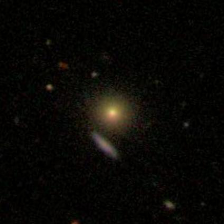

Pred:  ['smooth', 'completely round']
True:  ['smooth', 'completely round']


In [390]:
display_random_image_and_predlabel()

In [489]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace)
          (downsample): Se

In [496]:
learn.model[0][-1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25)
  (4): Linear(in_features=4096, out_features=512, bias=True)
  (5): ReLU(inplace)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5)
  (8): Linear(in_features=512, out_features=37, bias=True)
)

In [499]:
doc(learn.freeze)

In [500]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________

In [502]:
learn.model = model_old

In [512]:
learn.layer_groups[-1]

Sequential(
  (0): AdaptiveAvgPool2d(output_size=1)
  (1): AdaptiveMaxPool2d(output_size=1)
  (2): Flatten()
  (3): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Dropout(p=0.2)
  (5): Linear(in_features=4096, out_features=512, bias=True)
  (6): ReLU(inplace)
  (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropout(p=0.4)
  (9): Linear(in_features=512, out_features=37, bias=True)
)

In [524]:
models.resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F